<a href="https://colab.research.google.com/github/matHoYoung/AI_18_JHY_section1/blob/main/AI_18_%EC%A0%95%ED%98%B8%EC%98%81_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

정호영님은 게임 회사의 데이터 팀에 합류했습니다.

***다음 분기에 어떤 게임을 설계해야 할까***

라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.



# 필수 조건

##다음 필수 조건은 전부 만족해야 2점을 받을 수 있습니다.

- 영상 길이 조건을 만족했는가?
 영상이 5분 ~ 10분 사이로 제작됨

- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?

 -지역은 어떻게 구분했는지 설명함

 -지역별로 선호하는 게임의 장르를 파악함

 -지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

- 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?

 -트렌드는 어떤 것을 기준으로 파악했는지 설명함

 -연도별로 트렌드가 존재하는지 여부를 언급함

 -왜 존재한다/존재하지 않는다고 생각했는지 설명함

- 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?

 -인기가 많다는 것을 어떻게 정의했는지 설명함

 -해당 게임이 왜 인기가 많다고 생각했는지 설명함

 -시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목, 축이름 필수, 그 외 파라미터는 선택사항)

 -해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함

- 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?
 분석에 대한 결론이 영상에서 제시됨

# 추가 조건 (Advanced Goal)
## 다음 추가 조건은 1개 이상 만족 시 3점을 받을 수 있습니다.

-디테일한 시점 및 목표 설정이 문제 정의 과정에서 제시되었는가?

-도메인 지식을 활용하여 비지니스 인사이트를 도출하였는가?

-제공된 데이터셋 외에 추가 데이터를 사용하였는가?

-통계적 기법을 활용한 가설 검정을 진행하였는가?

-완성도 높은 시각화를 보여주었는가?

-가독성, 목적성이 잘 드러나는 시각화


ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 배급한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
game = pd.read_csv('vgames2.csv',index_col = 0)
game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
game.shape

(16598, 9)

In [5]:
# 품질적 문제와 구조적 문제 확인하기. 

In [6]:
# 품질적 문제 확인 
#중복값, 결측치, 부정확한 데이터 있는지 파악해보자. 

In [7]:
#중복값은 1이므로 분석 결과에 큰 영향을 끼치지 않는 다고 판단, 1개의 중복 값 제거
game.duplicated().sum()
game = game.drop_duplicates()

In [8]:
# index 재정렬
game = game.reset_index(drop=True)

In [9]:
#각 컬럼별 결측치 확인하기. 
# Name 결측치 0 
game[game['Name'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [10]:
game.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
# Year, Genre, Publisher 3가지 동시의 결측치 확인  0 
game[(game['Year'].isnull()) & (game['Genre'].isnull()) & (game['Publisher'].isnull())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [12]:
# Year, Genre 2가지 동시의 결측치 확인  0 
game[(game['Year'].isnull()) & (game['Genre'].isnull())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [13]:
# Year, Publisher 2가지 동시의 결측치 확인  22
game_year_publisher = game[(game['Year'].isnull()) & (game['Publisher'].isnull())]
game_year_publisher

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2970,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0,0,0.06,0
3184,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0,0.01
3533,B.L.U.E.: Legend of Water,PS,NaN,Adventure,NaN,0,0,0.04,0
3562,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0,0.41
3639,Homeworld Remastered Collection,PC,NaN,Strategy,NaN,0,0.01,0,0
4308,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,NaN,0,0,0.02,0
6209,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,NaN,0,0,0.1,0
6392,Brothers in Arms: Furious 4,X360,NaN,Shooter,NaN,0.01,0,0,0


In [14]:
# Genre, Publisher 2가지 동시의 결측치 확인  0
game_Genre_publisher = game[(game['Genre'].isnull()) & (game['Publisher'].isnull())]
game_Genre_publisher.shape

(0, 9)

In [15]:
# 요구사항에 publisher는 없으므로 분석에 영향을 주지 않을 것이라 판단하여 삭제 처리. 
game = game.drop(['Publisher'], axis = 1)
game

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,0.05,0.05,0.25,0.03


In [16]:
game.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [17]:
game['Year'].value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [18]:
# 결측치 제거
game.dropna(subset=['Year','Genre'], inplace=True)
game.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [19]:
#year 컬럼 조건에 맞게 올바른 값으로 대체하기 
game.Year = game.Year.astype(int).astype(str)
game.loc[game['Year'].astype(int)<=9, 'Year'] = '200' + game.loc[game['Year'].astype(int)<=9, 'Year'].astype(str)
game.loc[game['Year'].astype(int)<=23, 'Year'] = '20' + game.loc[game['Year'].astype(int)<=23, 'Year'].astype(str)
game.loc[game['Year'].astype(int)<=100, 'Year'] = '19' + game.loc[game['Year'].astype(int)<=100, 'Year'].astype(str)
game.Year = game.Year.astype(int)

In [20]:
# 품질적, 구조적 문제 완료 
game = game.reset_index(drop=True)
game

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0,0,0
1,The Munchables,Wii,2009,Action,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...
16272,Ice Age 2: The Meltdown,GC,2006,Platform,0.15,0.04,0,0.01
16273,Rainbow Islands: Revolution,PSP,2005,Action,0.01,0,0,0
16274,NBA 2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13
16275,Toukiden: The Age of Demons,PSV,2013,Action,0.05,0.05,0.25,0.03


- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?

-지역은 어떻게 구분했는지 설명함

-지역별로 선호하는 게임의 장르를 파악함

-지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

In [21]:
# 요구 조건에 맞는 시각화 진행 
# 1. 지역별 선호하는 게임의 장르 파악 
game_Genre = game[['Genre','NA_Sales','EU_Sales','JP_Sales', 'Other_Sales']]
game_Genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0,0,0
1,Action,0.17,0,0,0.01
2,Adventure,0,0,0.02,0
3,Misc,0.04,0,0,0
4,Platform,0.12,0.09,0,0.04
...,...,...,...,...,...
16272,Platform,0.15,0.04,0,0.01
16273,Action,0.01,0,0,0
16274,Sports,0.44,0.19,0.03,0.13
16275,Action,0.05,0.05,0.25,0.03


In [22]:
# NA_Sales M 단위로 맞추기 
game["NA_Sales"] = game["NA_Sales"].str.replace("K","")
game["NA_Sales"] = game["NA_Sales"].str.replace("M","")
game.NA_Sales = game.NA_Sales.astype(float)
game.loc[game['NA_Sales'] >= 10, 'NA_Sales'] = game.loc[game['NA_Sales'] >= 10, 'NA_Sales'] / 1000

In [23]:
# EU_Sales M 단위로 맞추기
game["EU_Sales"] = game["EU_Sales"].str.replace("K","")
game["EU_Sales"] = game["EU_Sales"].str.replace("M","")
game.EU_Sales = game.EU_Sales.astype(float)
game.loc[game['EU_Sales'] >= 10, 'EU_Sales'] = game.loc[game['EU_Sales'] >= 10, 'EU_Sales'] / 1000

In [24]:
# JP_Sales M 단위로 맞추기
game["JP_Sales"] = game["JP_Sales"].str.replace("K","")
game["JP_Sales"] = game["JP_Sales"].str.replace("M","")
game.JP_Sales = game.JP_Sales.astype(float)
game.loc[game['JP_Sales'] >= 10, 'JP_Sales'] = game.loc[game['JP_Sales'] >= 10, 'JP_Sales'] / 1000

In [25]:
# Other_Sales M 단위로 맞추기
game["Other_Sales"] = game["Other_Sales"].str.replace("K","")
game["Other_Sales"] = game["Other_Sales"].str.replace("M","")
game.Other_Sales = game.Other_Sales.astype(float)
game.loc[game['Other_Sales'] >= 10, 'Other_Sales'] = game.loc[game['Other_Sales'] >= 10, 'Other_Sales'] / 1000

In [26]:
# 장르 별 NA, EU, JP, OTHER 의 합계를 산정하여 시각화 진행하기 
# 장르 12 가지 ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation','Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting','Shooter]

In [27]:
game_sum = game.groupby('Genre').agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum'})
game_sum.NA_Sales = game_sum.NA_Sales.astype(int)
game_sum.EU_Sales = game_sum.EU_Sales.astype(int)
game_sum.JP_Sales = game_sum.JP_Sales.astype(int)
game_sum.Other_Sales = game_sum.Other_Sales.astype(int)
game_sum.round(0)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858,513,156,173
Adventure,101,63,51,16
Fighting,220,99,87,36
Misc,371,210,104,72
Platform,366,200,130,51
Puzzle,98,50,56,12
Racing,338,222,56,76
Role-Playing,307,183,332,56
Shooter,547,310,38,101


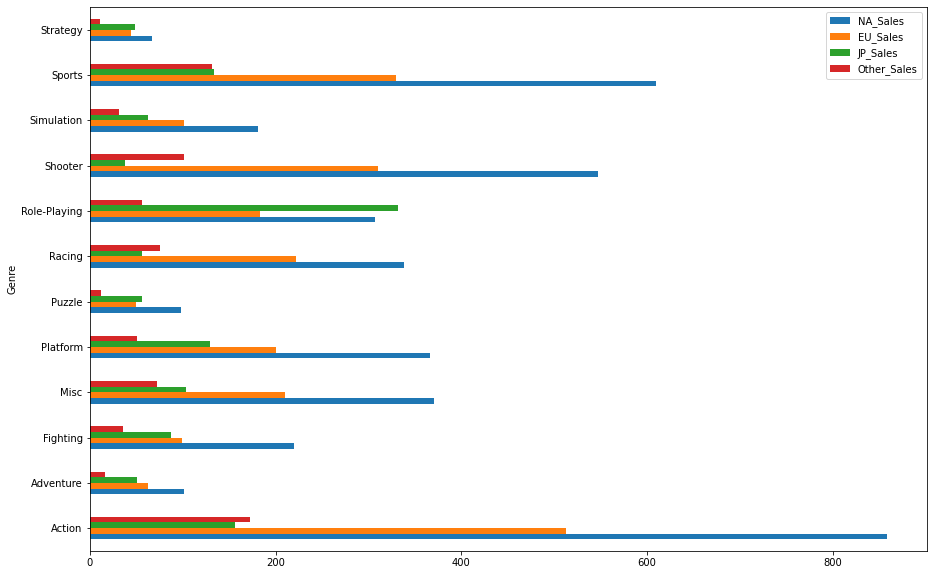

In [28]:
# NA 지역에서는 1위 액션장르와  2위 스포츠장르가 인기가 있다.
# EU 지역에서는 1위 액션장르와  2위 스포츠장르가 인기가 있다.
# JP 지역에서는 1위 롤플레잉장르와  2위 액션장르가 인기가 있다.
# OTHER 지역에서는 1위 액션장르와  2위 스포츠장르가 인기가 있다.
# 전반적으로 모든 지역에서 액션게임이 인기가 많다.
game_sum.plot(kind = 'barh',figsize=(15,10));

- 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?

 -트렌드는 어떤 것을 기준으로 파악했는지 설명함

 -연도별로 트렌드가 존재하는지 여부를 언급함

 -왜 존재한다/존재하지 않는다고 생각했는지 설명함


In [ ]:
# 10년 기준으로 연도별로 어떤 게임이 인기가 많았는지 파악하기 
# 각 연도별 전 지역에서 가장 많이 팔린 5개 게임을 파악하여 해당 게임에 대한 장르를 분석하기.

In [61]:
#1980 년대 게임 
game_1980 = game[game['Year'] < 1990]
game_1980

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
36,Beamrider,2600,1984,Racing,0.26,0.01,0.00,0.00
57,Bomberman,NES,1985,Puzzle,0.18,0.00,0.85,0.00
74,Wrecking Crew,NES,1985,Platform,0.00,0.00,0.51,0.00
153,Gegege no Kitarou 2: Youkai Gundan no Chousen,NES,1987,Role-Playing,0.00,0.00,1.25,0.00
207,Mountain King,2600,1982,Action,0.29,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...
15949,Frogs And Flies,2600,1981,Action,0.33,0.02,0.00,0.00
16001,Polaris,2600,1982,Action,0.26,0.02,0.00,0.00
16047,Pitfall II: Lost Caverns,2600,1983,Platform,1.22,0.07,0.00,0.02
16077,Mega Man 2,NES,1988,Action,0.93,0.15,0.42,0.01


In [86]:
game_1980['sales_sum'] = game_1980.iloc[:,4:8].sum( axis= 1)
game_1980 = game_1980.reset_index(drop = True)
game_1980

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sales_sum
0,Beamrider,2600,1984,Racing,0.26,0.01,0.00,0.00,0.27
1,Bomberman,NES,1985,Puzzle,0.18,0.00,0.85,0.00,1.03
2,Wrecking Crew,NES,1985,Platform,0.00,0.00,0.51,0.00,0.51
3,Gegege no Kitarou 2: Youkai Gundan no Chousen,NES,1987,Role-Playing,0.00,0.00,1.25,0.00,1.25
4,Mountain King,2600,1982,Action,0.29,0.02,0.00,0.00,0.31
...,...,...,...,...,...,...,...,...,...
199,Frogs And Flies,2600,1981,Action,0.33,0.02,0.00,0.00,0.35
200,Polaris,2600,1982,Action,0.26,0.02,0.00,0.00,0.28
201,Pitfall II: Lost Caverns,2600,1983,Platform,1.22,0.07,0.00,0.02,1.31
202,Mega Man 2,NES,1988,Action,0.93,0.15,0.42,0.01,1.51


In [87]:
# 인덱스 176, 55, 73, 97, 113 순으로 1980년대에 인기가 많았음. 
game_1980['sales_sum'].sort_values(ascending =False)

176    17.28000
55     11.18908
73      7.81000
97      7.46000
113     7.32083
         ...   
83      0.07000
78      0.06000
116     0.04000
114     0.03000
108     0.02000
Name: sales_sum, Length: 204, dtype: float64

In [88]:
# 1980년대에는 슈퍼마리오 게임이 대부분 구성되었으며 플랫폼 장르가 인기가 많았음. 
game_1980_top5 = game_1980.iloc[[176, 55, 73, 97, 113], :]
game_1980_top5

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sales_sum
176,Super Mario Bros. 3,NES,1988,Platform,9.54000,3.44,3.84,0.46,17.28000
55,Super Mario Bros.,NES,1985,Platform,0.02908,3.58,6.81,0.77,11.18908
73,Pac-Man,2600,1982,Puzzle,7.28000,0.45,0.00,0.08,7.81000
97,Super Mario Bros. 2,NES,1988,Platform,5.39000,1.18,0.70,0.19,7.46000
113,Super Mario Land,GB,1989,Platform,0.01083,2.71,4.18,0.42,7.32083


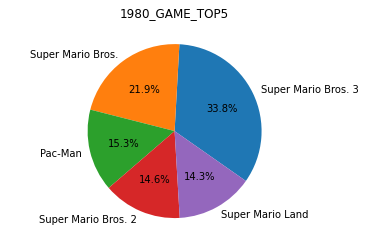

In [89]:
plt.axis('equal')
plt.title('1980_GAME_TOP5')
plt.pie(game_1980_top5['sales_sum'], labels = game_1980_top5['Name'], startangle = 325, autopct = '%1.1f%%')
plt.show;

In [46]:
#1990 년대 게임 
game_1990 = game[(game['Year'] < 2000) & (game['Year'] >= 1990)]
game_1990

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
21,Ghost in the Shell,PS,1997,Simulation,0.06,0.04,0.00,0.01
26,Starwinder: The Ultimate Space Race,PS,1996,Racing,0.03,0.02,0.00,0.00
45,Nippon Daihyou Team no Kantoku ni Narou! Sekai...,SAT,1998,Sports,0.00,0.00,0.12,0.00
63,Virtua Fighter 3tb,DC,1998,Fighting,0.00,0.00,0.37,0.00
68,Command & Conquer,N64,1999,Strategy,0.22,0.05,0.00,0.00
...,...,...,...,...,...,...,...,...
16249,Power Pro Kun Pocket,GB,1999,Sports,0.00,0.00,0.17,0.00
16258,Gex: Enter the Gecko,PS,1998,Platform,0.32,0.22,0.00,0.04
16262,Shanghai: True Valor,PS,1998,Puzzle,0.01,0.01,0.00,0.00
16268,Namco Soccer Prime Goal,PS,1995,Sports,0.00,0.00,0.12,0.01


In [90]:
game_1990['sales_sum'] = game_1990.iloc[:,4:8].sum( axis= 1)
game_1990 = game_1990.reset_index(drop = True)
game_1990

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sales_sum
0,Ghost in the Shell,PS,1997,Simulation,0.06,0.04,0.00,0.01,0.11
1,Starwinder: The Ultimate Space Race,PS,1996,Racing,0.03,0.02,0.00,0.00,0.05
2,Nippon Daihyou Team no Kantoku ni Narou! Sekai...,SAT,1998,Sports,0.00,0.00,0.12,0.00,0.12
3,Virtua Fighter 3tb,DC,1998,Fighting,0.00,0.00,0.37,0.00,0.37
4,Command & Conquer,N64,1999,Strategy,0.22,0.05,0.00,0.00,0.27
...,...,...,...,...,...,...,...,...,...
1759,Power Pro Kun Pocket,GB,1999,Sports,0.00,0.00,0.17,0.00,0.17
1760,Gex: Enter the Gecko,PS,1998,Platform,0.32,0.22,0.00,0.04,0.58
1761,Shanghai: True Valor,PS,1998,Puzzle,0.01,0.01,0.00,0.00,0.02
1762,Namco Soccer Prime Goal,PS,1995,Sports,0.00,0.00,0.12,0.01,0.13


In [91]:
# 인덱스 986, 901, 648, 691, 492 순으로 1980년대에 인기가 많았음. 
game_1990['sales_sum'].sort_values(ascending =False)

986     23.09
901     14.64
648     11.90
691     11.18
492     10.95
        ...  
1709     0.01
938      0.01
87       0.01
224      0.01
544      0.01
Name: sales_sum, Length: 1764, dtype: float64

In [93]:
# 1990년대에는 상위 1,2 등이 포켓몬 게임이구성되었으며 롤플레잉 장르가 인기가 많았음. 그 뒤로는 3,4등이 슈퍼마리오로 80년대의 영향이 큰것으로 예상. 
game_1990_top5 = game_1990.iloc[[986, 901, 648, 691, 492], :]
game_1990_top5

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sales_sum
986,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,23.09
901,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,5.89,5.04,3.12,0.59,14.64
648,Super Mario 64,N64,1996,Platform,6.91,2.85,1.91,0.23,11.90
691,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,6.16,2.04,2.69,0.29,11.18
492,Gran Turismo,PS,1997,Racing,4.02,3.87,2.54,0.52,10.95


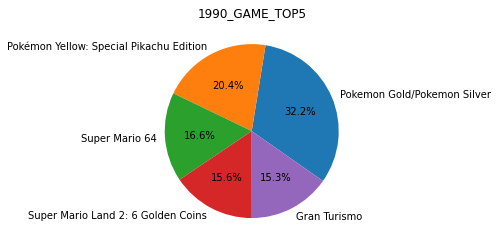

In [94]:
plt.axis('equal')
plt.title('1990_GAME_TOP5')
plt.pie(game_1990_top5['sales_sum'], labels = game_1990_top5['Name'], startangle = 325, autopct = '%1.1f%%')
plt.show;

In [47]:
#2000 년대 게임 
game_2000 =game[(game['Year'] < 2010) & (game['Year'] >= 2000)]
game_2000

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01
5,Power Pro Kun Pocket 8,DS,2005,Sports,0.00,0.00,0.14,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,0.00,0.00,0.04,0.00
...,...,...,...,...,...,...,...,...
16266,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,0.00,0.00,0.08,0.01
16270,Madden NFL 2005,PS2,2004,Sports,4.18,0.26,0.01,0.08
16271,Minna no Chizu 2,PSP,2007,Misc,0.00,0.00,0.02,0.00
16272,Ice Age 2: The Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01


In [48]:
#2010, 2020년대 게임 , 2020년은 1개밖에없었음
game_2010 = game[(game['Year'] <= 2020) & (game['Year'] >= 2010)]
game_2010

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,0.02,0.01,0.00,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,0.04,0.03,0.00,0.01
...,...,...,...,...,...,...,...,...
16261,LEGO The Hobbit,XOne,2014,Action,0.13,0.12,0.00,0.02
16267,MindJack,PS3,2011,Shooter,0.07,0.08,0.00,0.03
16269,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,0.00,0.00,0.05,0.00
16274,NBA 2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13
